In [40]:
import pandas as pd 
import numpy as np
import time
import datetime

In [41]:
df = pd.read_csv('data_file.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
print(df.head())

                     216  1300  2483  2947  3215  4488  5468  6264  7330
ts                                                                      
2017-01-01 00:00:00  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2017-01-01 01:00:00  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2017-01-01 02:00:00  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2017-01-01 03:00:00  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2017-01-01 04:00:00  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   216     8760 non-null   float64
 1   1300    8755 non-null   float64
 2   2483    8735 non-null   float64
 3   2947    8627 non-null   float64
 4   3215    8760 non-null   float64
 5   4488    8748 non-null   float64
 6   5468    8759 non-null   float64
 7   6264    8760 non-null   float64
 8   7330    8731 non-null   float64
dtypes: float64(9)
memory usage: 684.4 KB


In [43]:
df = df.resample('D').sum()

In [44]:
df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='ts', length=365, freq='D')

In [45]:
df.head()

,216,1300,2483,2947,3215,4488,5468,6264,7330
ts,,,,,,,,,
2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
2017-01-02,1.4,3.1,2.1,2.3,0.2,3.1,1.6,3.6,4.0
2017-01-03,1.5,1.4,3.7,1.4,0.8,1.6,1.3,5.7,0.2
2017-01-04,11.8,17.9,4.9,6.2,4.7,10.3,9.3,7.8,10.5
2017-01-05,0.1,0.7,0.3,0.4,0.1,0.5,0.1,0.0,0.0


In [46]:
df.reset_index(level=0, inplace=True)

In [47]:
df.head()

,ts,216,1300,2483,2947,3215,4488,5468,6264,7330
0,2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
1,2017-01-02,1.4,3.1,2.1,2.3,0.2,3.1,1.6,3.6,4.0
2,2017-01-03,1.5,1.4,3.7,1.4,0.8,1.6,1.3,5.7,0.2
3,2017-01-04,11.8,17.9,4.9,6.2,4.7,10.3,9.3,7.8,10.5
4,2017-01-05,0.1,0.7,0.3,0.4,0.1,0.5,0.1,0.0,0.0


In [48]:
data = df.loc[(df['ts'] >= '2017-04-16') & (df['ts'] <= '2017-08-16')]


In [49]:
data.head()

,ts,216,1300,2483,2947,3215,4488,5468,6264,7330
105,2017-04-16,4.3,3.3,4.4,4.7,1.7,2.1,7.7,1.8,2.0
106,2017-04-17,14.6,9.3,13.6,12.0,7.6,9.6,14.3,8.3,6.4
107,2017-04-18,2.6,4.1,5.3,4.1,4.1,5.1,2.5,5.6,7.4
108,2017-04-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,2017-04-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
data.tail()

,ts,216,1300,2483,2947,3215,4488,5468,6264,7330
223,2017-08-12,8.0,10.6,14.3,4.6,7.4,13.6,9.8,9.0,5.6
224,2017-08-13,4.3,0.6,6.3,3.8,1.8,3.5,3.1,0.2,0.0
225,2017-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,2017-08-15,1.4,0.4,3.2,0.3,0.1,0.2,2.2,0.0,0.6
227,2017-08-16,11.7,6.8,8.8,7.1,3.5,4.3,4.6,4.9,0.5


In [51]:
data['CF_216'] = data['216'].cumsum()
data['CF_2947'] = data['2947'].cumsum()
data['CF_5468'] = data['5468'].cumsum()
data['CF_1300'] = data['1300'].cumsum()
data['CF_2483'] = data['2483'].cumsum()
data['CF_3215'] = data['3215'].cumsum()
data['CF_4488'] = data['4488'].cumsum()
data['CF_6264'] = data['6264'].cumsum()
data['CF_7330'] = data['7330'].cumsum()

<ipython-input-51-9aeabb498a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CF_216'] = data['216'].cumsum()
<ipython-input-51-9aeabb498a3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CF_2947'] = data['2947'].cumsum()
<ipython-input-51-9aeabb498a3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [52]:
data.head()

,ts,216,1300,2483,2947,3215,4488,5468,6264,7330,CF_216,CF_2947,CF_5468,CF_1300,CF_2483,CF_3215,CF_4488,CF_6264,CF_7330
105,2017-04-16,4.3,3.3,4.4,4.7,1.7,2.1,7.7,1.8,2.0,4.3,4.7,7.7,3.3,4.4,1.7,2.1,1.8,2.0
106,2017-04-17,14.6,9.3,13.6,12.0,7.6,9.6,14.3,8.3,6.4,18.9,16.7,22.0,12.6,18.0,9.3,11.7,10.1,8.4
107,2017-04-18,2.6,4.1,5.3,4.1,4.1,5.1,2.5,5.6,7.4,21.5,20.8,24.5,16.7,23.3,13.4,16.8,15.7,15.8
108,2017-04-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.5,20.8,24.5,16.7,23.3,13.4,16.8,15.7,15.8
109,2017-04-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.5,20.8,24.5,16.7,23.3,13.4,16.8,15.7,15.8


In [53]:
data.to_csv(r'OLP_HSK_cumulative_sum_data.csv', encoding='utf-8', index=False)

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline
import matplotlib as mpl

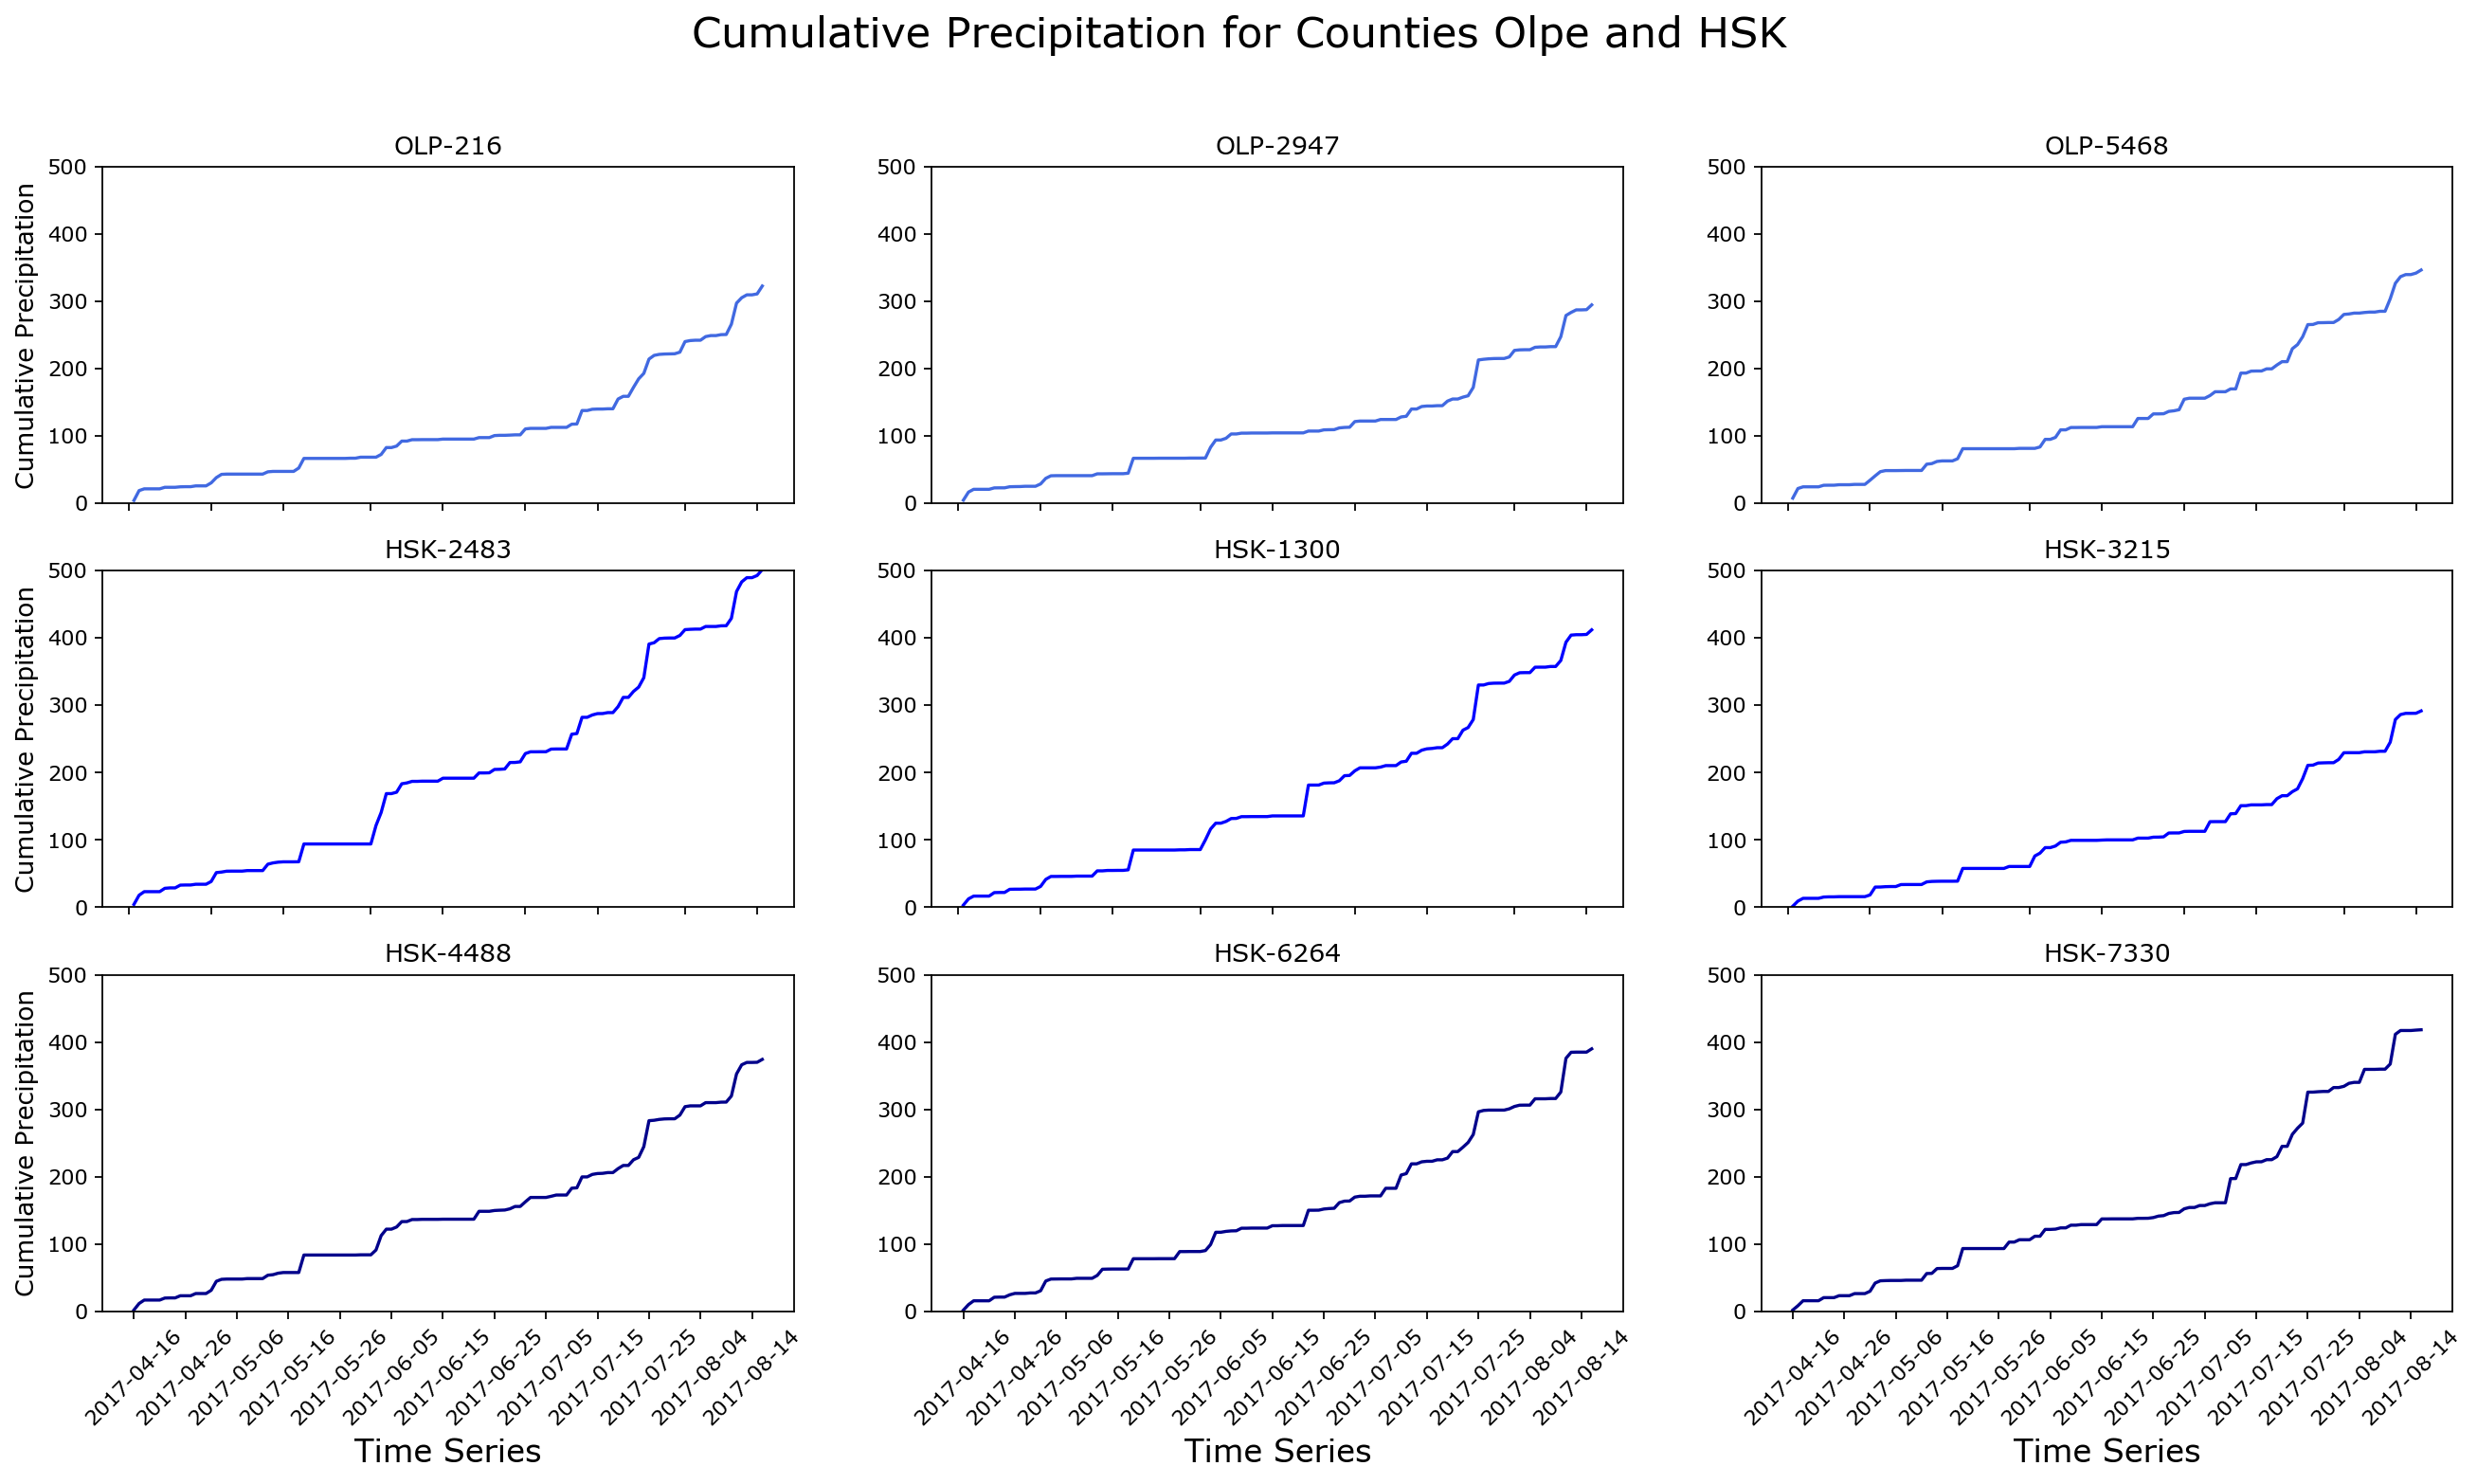

In [55]:
fig = plt.figure(dpi = 160, figsize = (20,10), clear = True)
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

ax1.set_title('OLP-216')
ax1.set_ylim([0,500])
ax1.set_xticklabels([])
ax1.plot(data.ts, data.CF_216, color='royalblue')
ax1.set_ylabel('Cumulative Precipitation', fontsize=12)

ax2.set_title('OLP-2947')
ax2.set_ylim([0,500])
ax2.set_xticklabels([])
ax2.plot(data.ts, data.CF_2947, color = 'royalblue')

ax3.set_title('OLP-5468')
ax3.set_ylim([0,500])
ax3.set_xticklabels([])
ax3.plot(data.ts, data.CF_5468, color='royalblue')

ax4.set_title('HSK-2483')
ax4.set_ylim([0,500])
ax4.set_xticklabels([])
ax4.plot(data.ts, data.CF_2483, color='blue')
ax4.set_ylabel('Cumulative Precipitation', fontsize=12)

ax5.set_title('HSK-1300')
ax5.set_ylim([0,500])
ax5.set_xticklabels([])
ax5.plot(data.ts, data.CF_1300, color='blue')

ax6.set_title('HSK-3215')
ax6.set_ylim([0,500])
ax6.set_xticklabels([])
ax6.plot(data.ts, data.CF_3215, color='blue')

ax7.set_title('HSK-4488')
ax7.set_ylim([0,500])
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)
ax7.plot(data.ts, data.CF_4488, color='darkblue')
ax7.set_xlabel('Time Series', fontsize=15)
ax7.set_ylabel('Cumulative Precipitation', fontsize=12)

xtick_locator = mpl.dates.DayLocator(interval=10)
xtick_formatter = mpl.dates.AutoDateFormatter(xtick_locator)
ax7.xaxis.set_major_locator(xtick_locator)
ax7.xaxis.set_major_formatter(xtick_formatter)

ax8.set_title('HSK-6264') 
ax8.set_ylim([0,500])
plt.setp(ax8.xaxis.get_majorticklabels(), rotation=45)
ax8.set_xlabel('Time Series', fontsize=15)
ax8.plot(data.ts, data.CF_6264, color='darkblue')

xtick_locator = mpl.dates.DayLocator(interval=10)
xtick_formatter = mpl.dates.AutoDateFormatter(xtick_locator)
ax8.xaxis.set_major_locator(xtick_locator)
ax8.xaxis.set_major_formatter(xtick_formatter)

ax9.set_title('HSK-7330') 
ax9.set_ylim([0,500])
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=45)
ax9.set_xlabel('Time Series', fontsize=15)
ax9.plot(data.ts, data.CF_7330, color='darkblue')

xtick_locator = mpl.dates.DayLocator(interval=10)
xtick_formatter = mpl.dates.AutoDateFormatter(xtick_locator)
ax9.xaxis.set_major_locator(xtick_locator)
ax9.xaxis.set_major_formatter(xtick_formatter)

fig.suptitle("Cumulative Precipitation for Counties Olpe and HSK", fontsize= 20)

fig.savefig("cumulative_precipitation_line_graph.png")

plt.show()

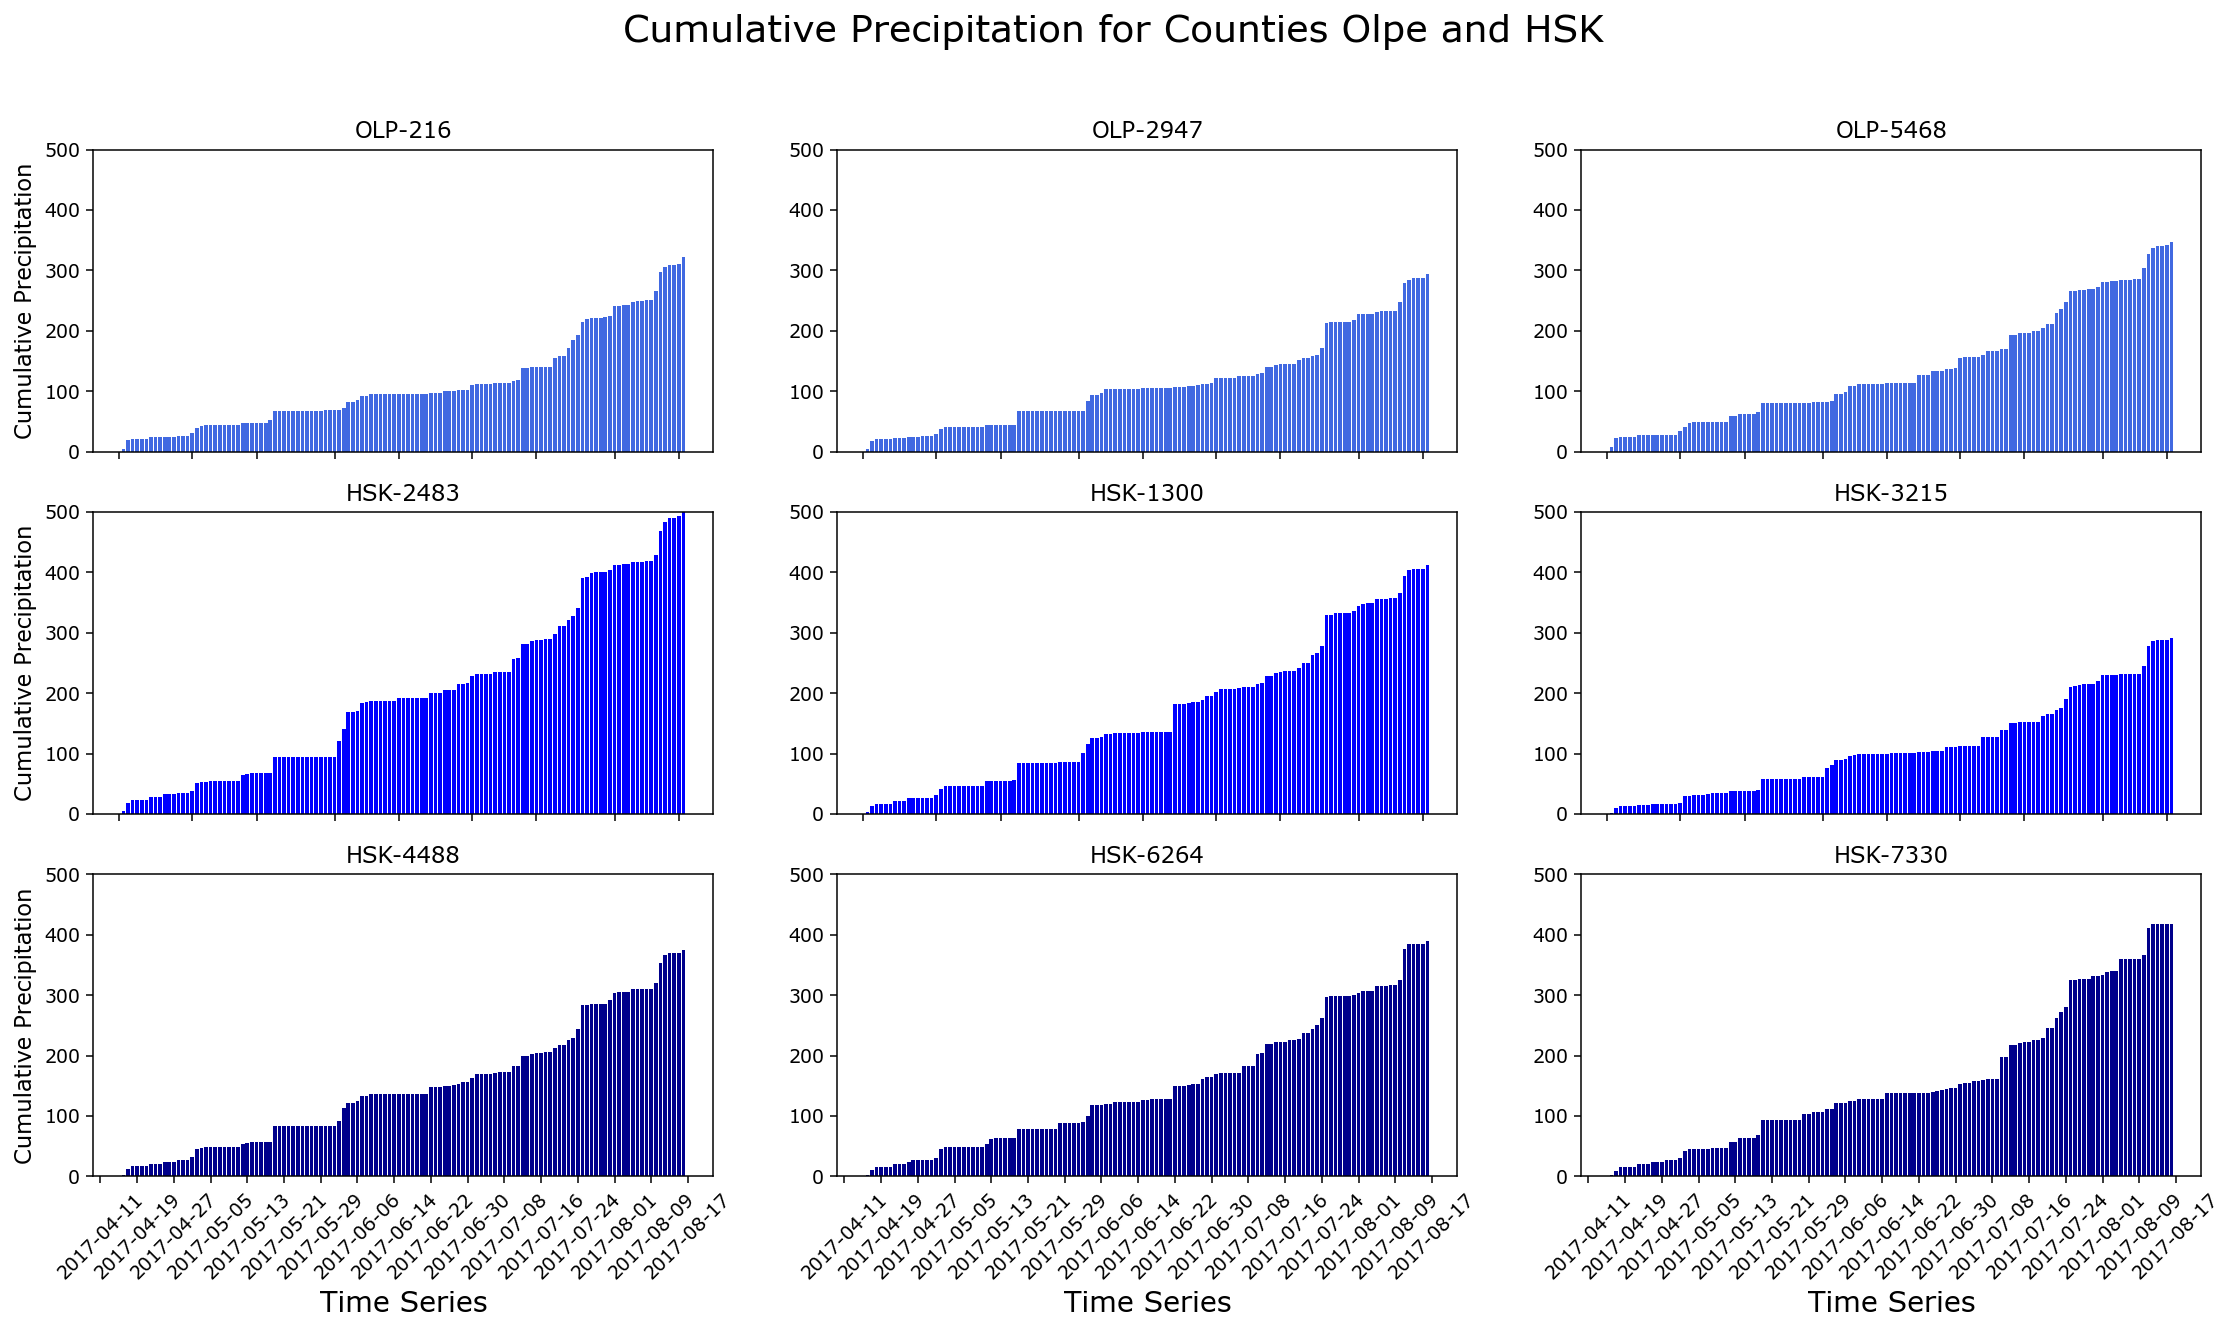

In [56]:
fig = plt.figure(dpi = 136, figsize = (20,10), clear = True)
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

ax1.set_title('OLP-216')
ax1.set_ylim([0,500])
ax1.set_xticklabels([])
ax1.bar(x = 'ts', height= 'CF_216', data=data, color='royalblue')
ax1.set_ylabel('Cumulative Precipitation', fontsize=12)

ax2.set_title('OLP-2947')
ax2.set_ylim([0,500])
ax2.set_xticklabels([])
ax2.bar(x = 'ts', height= 'CF_2947', data=data, color='royalblue')

ax3.set_title('OLP-5468')
ax3.set_ylim([0,500])
ax3.set_xticklabels([])
ax3.bar(x = 'ts', height= 'CF_5468', data=data, color='royalblue')

ax4.set_title('HSK-2483')
ax4.set_xticklabels([])
ax4.set_ylim([0,500])
ax4.bar(x = 'ts', height= 'CF_2483', data=data, color='blue')
ax4.set_ylabel('Cumulative Precipitation', fontsize=12)

ax5.set_title('HSK-1300')
ax5.set_ylim([0,500])
ax5.set_xticklabels([])
ax5.bar(x = 'ts', height= 'CF_1300', data=data, color='blue')

ax6.set_title('HSK-3215')
ax6.set_ylim([0,500])
ax6.set_xticklabels([])
ax6.bar(x = 'ts', height= 'CF_3215', data=data, color='blue')

ax7.set_title('HSK-4488')
ax7.set_ylim([0,500])
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)
ax7.bar(x = 'ts', height= 'CF_4488', data=data, color='darkblue')
ax7.set_xlabel('Time Series', fontsize=15)
ax7.set_ylabel('Cumulative Precipitation', fontsize=12)

xtick_locator = mpl.dates.DayLocator(interval=8)
xtick_formatter = mpl.dates.AutoDateFormatter(xtick_locator)
ax7.xaxis.set_major_locator(xtick_locator)
ax7.xaxis.set_major_formatter(xtick_formatter)

ax8.set_title('HSK-6264')
ax8.set_ylim([0,500])
plt.setp(ax8.xaxis.get_majorticklabels(), rotation=45)
ax8.set_xlabel('Time Series', fontsize=15)
ax8.bar(x = 'ts', height= 'CF_6264', data=data, color='darkblue')

xtick_locator = mpl.dates.DayLocator(interval=8)
xtick_formatter = mpl.dates.AutoDateFormatter(xtick_locator)
ax8.xaxis.set_major_locator(xtick_locator)
ax8.xaxis.set_major_formatter(xtick_formatter)


ax9.set_title('HSK-7330') 
ax9.set_ylim([0,500])
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=45)
ax9.set_xlabel('Time Series', fontsize=15)
ax9.bar(x = 'ts', height= 'CF_7330', data=data, color='darkblue')

xtick_locator = mpl.dates.DayLocator(interval=8)
xtick_formatter = mpl.dates.AutoDateFormatter(xtick_locator)
ax9.xaxis.set_major_locator(xtick_locator)
ax9.xaxis.set_major_formatter(xtick_formatter)

fig.suptitle("Cumulative Precipitation for Counties Olpe and HSK", fontsize= 20)

fig.savefig("bar_chart_cumulative_sum_ex_4.png")

plt.show()

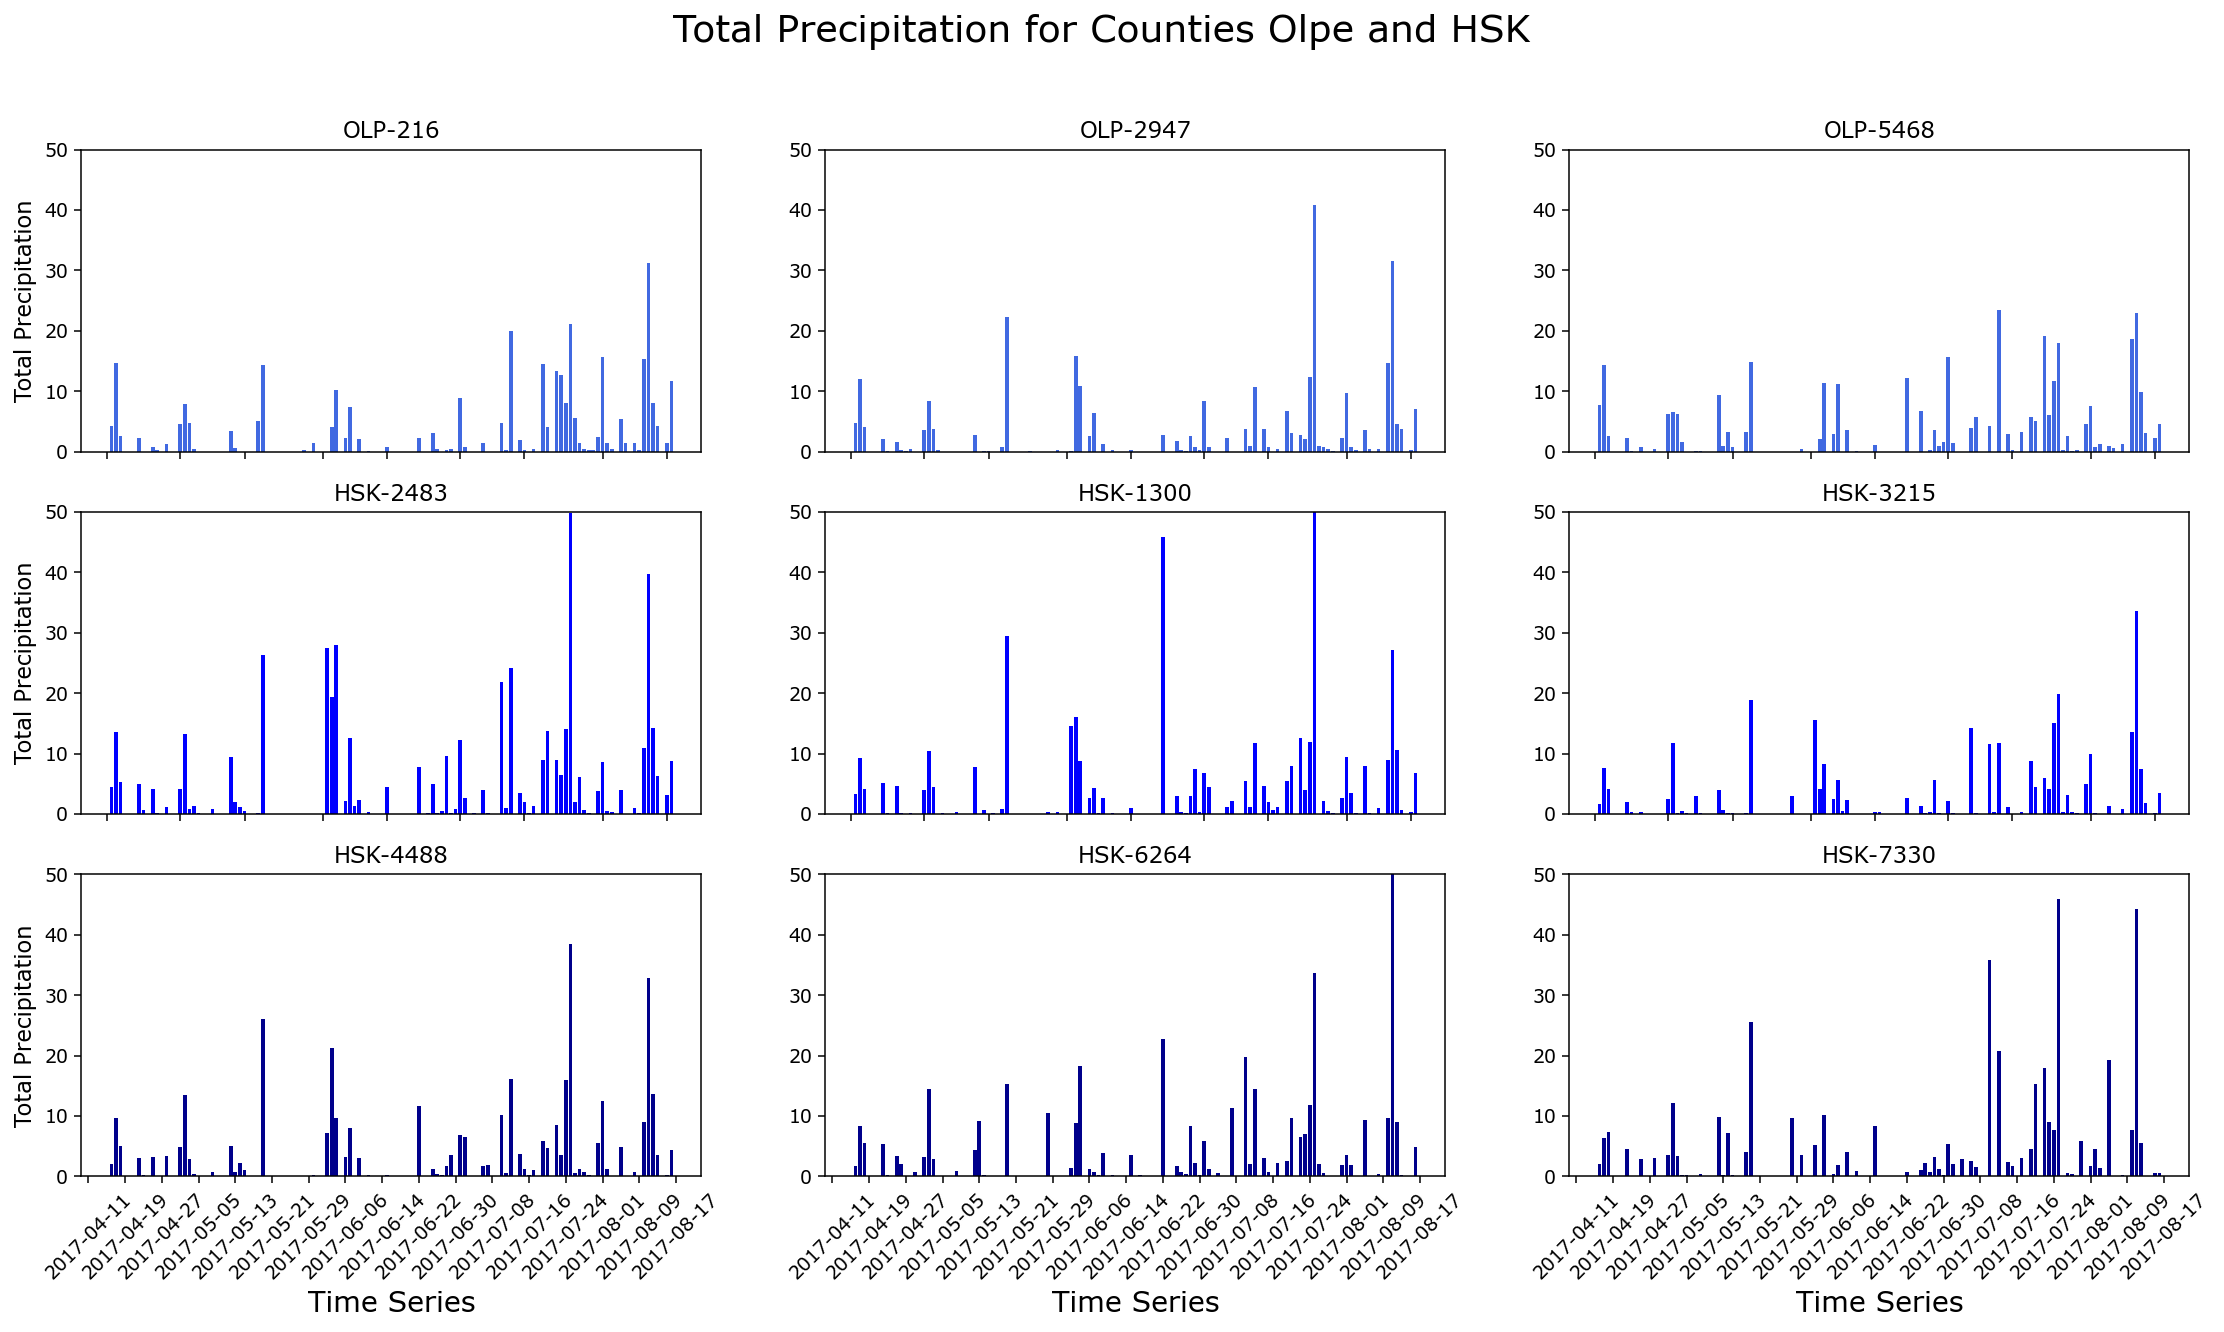

In [57]:
fig = plt.figure(dpi = 136, figsize = (20,10), clear = True)
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

ax1.set_title('OLP-216')
ax1.set_ylim([0,50])
ax1.set_xticklabels([])
ax1.bar(x = 'ts', height= '216', data=data, color='royalblue')
ax1.set_ylabel('Total Precipitation', fontsize=12)

ax2.set_title('OLP-2947')
ax2.set_ylim([0,50])
ax2.set_xticklabels([])
ax2.bar(x = 'ts', height= '2947', data=data, color='royalblue')

ax3.set_title('OLP-5468')
ax3.set_ylim([0,50])
ax3.set_xticklabels([])
ax3.bar(x = 'ts', height= '5468', data=data, color='royalblue')

ax4.set_title('HSK-2483')
ax4.set_ylim([0,50])
ax4.set_xticklabels([])
ax4.bar(x = 'ts', height= '2483', data=data, color='blue')
ax4.set_ylabel('Total Precipitation', fontsize=12)

ax5.set_title('HSK-1300') 
ax5.set_ylim([0,50])
ax5.set_xticklabels([])
ax5.bar(x = 'ts', height= '1300', data=data, color='blue')

ax6.set_title('HSK-3215')
ax6.set_ylim([0,50])
ax6.set_xticklabels([])
ax6.bar(x = 'ts', height= '3215', data=data, color='blue')

ax7.set_title('HSK-4488')
ax7.set_ylim([0,50])
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)
ax7.bar(x = 'ts', height= '4488', data=data, color='darkblue')
ax7.set_xlabel('Time Series', fontsize=15)
ax7.set_ylabel('Total Precipitation', fontsize=12)

xtick_locator = mpl.dates.DayLocator(interval=8)
xtick_formatter = mpl.dates.AutoDateFormatter(xtick_locator)
ax7.xaxis.set_major_locator(xtick_locator)
ax7.xaxis.set_major_formatter(xtick_formatter)

ax8.set_title('HSK-6264') 
ax8.set_ylim([0,50])
plt.setp(ax8.xaxis.get_majorticklabels(), rotation=45)
ax8.set_xlabel('Time Series', fontsize=15)
ax8.bar(x = 'ts', height= '6264', data=data, color='darkblue')

xtick_locator = mpl.dates.DayLocator(interval=8)
xtick_formatter = mpl.dates.AutoDateFormatter(xtick_locator)
ax8.xaxis.set_major_locator(xtick_locator)
ax8.xaxis.set_major_formatter(xtick_formatter)

ax9.set_title('HSK-7330') 
ax9.set_ylim([0,50])
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=45)
ax9.set_xlabel('Time Series', fontsize=15)
ax9.bar(x = 'ts', height= '7330', data=data, color='darkblue')

xtick_locator = mpl.dates.DayLocator(interval=8)
xtick_formatter = mpl.dates.AutoDateFormatter(xtick_locator)
ax9.xaxis.set_major_locator(xtick_locator)
ax9.xaxis.set_major_formatter(xtick_formatter)

fig.savefig("bar_chart_total_precipitation_ex_4.png")

fig.suptitle("Total Precipitation for Counties Olpe and HSK", fontsize= 20)

plt.show()